In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (5, 5)

In [11]:
df=pd.read_csv('E:\Data Science Projects\datasets\healthcare-dataset-stroke-data (1).csv')

In [12]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


EXPLORATORY DATA ANALYSIS

In [13]:
df.shape

(5110, 12)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [15]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [16]:
df.bmi.describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [17]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [18]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [19]:
df.drop('id',axis=1,inplace=True)

In [20]:
from matplotlib.pyplot import figure
figure(num=None,figsize=(8,6),dpi=800,facecolor='w')

<Figure size 6400x4800 with 0 Axes>

<Figure size 6400x4800 with 0 Axes>

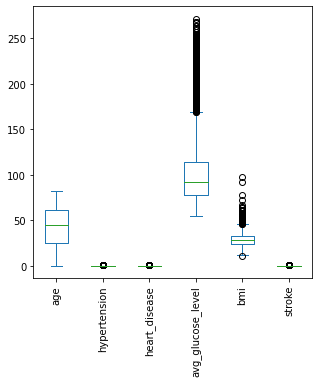

In [22]:
df.plot(kind='box')
plt.xticks(rotation=90)
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
obj_cols = object_columns = [col for col in df.columns if df[col].dtype == 'object']

In [26]:
object_columns

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [27]:
for i in df.columns:
    if(df[i].dtype=='object'):
        df[i]=le.fit_transform(df[i])
        print(df[i].value_counts())

0    2994
1    2115
2       1
Name: gender, dtype: int64
1    3353
0    1757
Name: ever_married, dtype: int64
2    2925
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64
1    2596
0    2514
Name: Residence_type, dtype: int64
2    1892
0    1544
1     885
3     789
Name: smoking_status, dtype: int64


In [28]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


Spliiting the dataset

In [30]:
X =df.drop('stroke',axis=1)
y=df['stroke']

In [31]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


In [32]:
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te =train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)


In [33]:
print(X_tr.shape)
print(X_te.shape)
print(y_tr.shape)
print(y_te.shape)

(3577, 10)
(1533, 10)
(3577,)
(1533,)


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
X_tr_scaled = scaler.fit_transform(X_tr)
X_te_scaled =scaler.transform(X_te)

In [36]:
# import pickle
# import os
# scaler_path=os.path.join('E:\Data Science Projects\New folder\stroke_pred/','models/scaler.pkl')
# with open(scaler_path,'wb') as scaler_file:
#     pickle.dump(scaler,scaler_file)

In [38]:
X_tr_scaled

array([[-0.84155578,  0.3890437 , -0.3261943 , ...,  0.04189211,
        -0.88702734, -0.34415909],
       [-0.84155578,  0.83368709, -0.3261943 , ..., -0.39247525,
         0.95977505, -1.28175016],
       [ 1.18554525,  1.67850954, -0.3261943 , ..., -0.23292536,
         0.06866061, -1.28175016],
       ...,
       [-0.84155578,  0.78922276, -0.3261943 , ..., -0.60765621,
         0.94686035, -0.34415909],
       [-0.84155578,  1.6340452 , -0.3261943 , ..., -0.65394126,
         0.67565161,  0.59343198],
       [-0.84155578, -1.65631591, -0.3261943 , ..., -0.33172613,
        -0.87411264, -1.28175016]])

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [40]:
dtc.fit(X_tr_scaled,y_tr)

DecisionTreeClassifier()

In [41]:
dtc.feature_importances_

array([0.02410936, 0.17567153, 0.0480328 , 0.01943298, 0.03089458,
       0.04266911, 0.02521133, 0.3393234 , 0.23019402, 0.0644609 ])

In [42]:
X_tr.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [43]:
pred =dtc.predict(X_te_scaled)

In [44]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
from sklearn.metrics import accuracy_score


In [46]:
ac_dt = accuracy_score(y_te,pred)

In [47]:
ac_dt

0.9073711676451403

Cross Validation for selecting the best models

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [49]:
lr = LogisticRegression(max_iter=100)
svc =SVC(kernel='linear')
knn =KNeighborsClassifier()
rf=RandomForestClassifier()

In [50]:
models=[lr,svc,knn,rf,dtc]

In [51]:
def cmp_model():
    for model in models:
        model.fit(X_tr,y_tr)
        pred=model.predict(X_te)
        accuracy=accuracy_score(y_te,pred) 
        
        print('Accuracy Score of the model :',model ,'=',accuracy)       

In [52]:
cmp_model()

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score of the model : LogisticRegression() = 0.949119373776908
Accuracy Score of the model : SVC(kernel='linear') = 0.9510763209393346
Accuracy Score of the model : KNeighborsClassifier() = 0.9445531637312459
Accuracy Score of the model : RandomForestClassifier() = 0.9497716894977168
Accuracy Score of the model : DecisionTreeClassifier() = 0.9060665362035225


In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
def cmp_cv():
    for model in models:
        cv_score = cross_val_score(model,X,y,cv=9)
        mean_accuracy = cv_score.mean()
        mean_accuracy = mean_accuracy*100
        mean_accuracy = round(mean_accuracy,2)
        
    print('Cross Validation accuracies for ', model, '=  ', cv_score)
    print('Accuracy % of the ', model, mean_accuracy)
    print('----------------------------------------------')

In [55]:
cmp_cv()

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Cross Validation accuracies for  DecisionTreeClassifier() =   [0.91197183 0.90316901 0.9084507  0.9084507  0.89788732 0.88908451
 0.92957746 0.92592593 0.92063492]
Accuracy % of the  DecisionTreeClassifier() 91.06
----------------------------------------------


In [57]:
param = {
    'kernel':['linear','poly','rbf','sigmoid'],
    'C':[2,5,8,10]
}

In [59]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [64]:
clf_grid = GridSearchCV(dtc,param,cv=9)
clf_rand = RandomizedSearchCV(dtc,param,cv=9)

In [66]:
# clf_grid.fit(X,y)
# clf_rand.fit(X,y)

In [1]:
df

NameError: name 'df' is not defined

Plotting the accuracy


In [ ]:
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM'],[ac_dt,ac_lr,ac_knn,ac_rf,ac_sv])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()